<a href="https://colab.research.google.com/github/Dcal-dev/For-Study/blob/master/For_Study_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로그램을 공부하려고 처음 만들어본 COLAB

---

시작일 19.11.23

---








시작은 간단한거 부터

In [0]:
print("hello python")
print("Hello",end=' ')
print("alph")

hello python
Hello alph


print라는 명령어에 여러가지 옵션을 추가할수 있다.


#RETARDING FORCE 
___
도전 : 19.11.24 23:06
___
cf: [Matplotlib Tutorial 16 - Live graphs](https://www.youtube.com/watch?v=ZmYPzESC5YY)

cf: [Model Your World with the GlowScript Trinket](https://trinket.io/glowscript/1e541a5795) : 대충 이런 형태가 목표

참고 서적 : Classical Dynamics of partivels and systems (MARION) (p.58~71)
* retarding force는 kmv로만 적용한다.


*주의! 같은 단어를 사용하게 된다면 colab에서는 한단어로 인식해주기 때문에 초기화하는 작업이 필요함

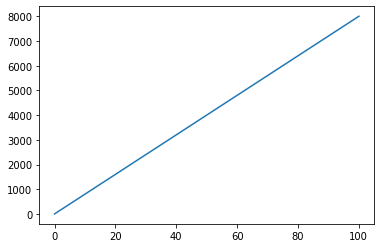

In [0]:
#@title 
import matplotlib.pyplot as plt
from math import cos,exp

#for non retarding force in 1d motion
x0=0
t=0
x=0
xarr=[]
xarr.append(x0)

tarr=[]
tarr.append(t)
v0=80
dt=0.05
dx=v0*dt

while t<=100:
  t+=dt
  x=x+dx
  xarr.append(x)
  tarr.append(t)
  
  
plt.plot(tarr,xarr)
plt.show()




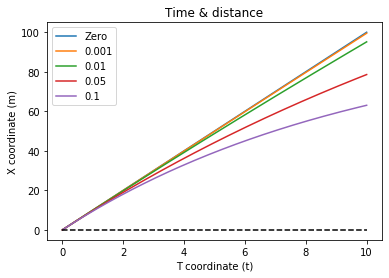

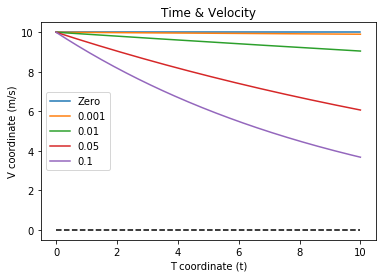

In [45]:
#@title retarding force 가 v에 비례할경우
from math import exp
from matplotlib import pyplot as plt

class bullet:
    def __init__(self,v0,x0,k,timelimit):
        self.v=v0
        self.v0=v0
        self.x=x0
        self.k=k

        self.t=0
        
        self.time=0
        self.timelimit=timelimit
        self.varr=[self.v]
        self.xarr=[self.x]
        self.tarr=[self.t]

    def updateT(self, dt):
        self.t+=dt
        return self.t

    def updateV(self, dt):
        self.v=self.v0*(exp(-self.k*self.updateT(dt)))
        
        return self.v

    def updateX(self, dt):
        self.x=self.x+self.updateV(dt)*dt
        
        return self.x

    def step(self, dt):
        self.xarr.append(self.updateX(dt))
        self.time=self.time+dt
        self.tarr.append(self.time)
        self.varr.append(self.v)
        return

def MakeShoot(v0,x0,k,timelimit):
    Bullet=bullet(v0,x0,k,timelimit)
    dt=0.05

    while Bullet.time<=timelimit:
        Bullet.step(dt)

    return Bullet.tarr,Bullet.xarr,Bullet.varr

def main():
    tl=10
    v0=10
    x0=0
    TZero,XZero,VZero   = MakeShoot(v0,x0,0.000,tl)
    T0_001,X0_001,V0_001= MakeShoot(v0,x0,0.001,tl)
    T0_01,X0_01,V0_01   = MakeShoot(v0,x0,0.01,tl)
    T0_05,X0_05,V0_05   = MakeShoot(v0,x0,0.05,tl)
    T0_1,X0_1,V0_1      = MakeShoot(v0,x0,0.1,tl)
    plt.figure("Time & distance")
    plt.plot(TZero,XZero, T0_001,X0_001, T0_01,X0_01, 
             T0_05,X0_05, T0_1,X0_1,
             [0, tl], [0, 0],'k--')
    plt.title("Time & distance")
    plt.legend(['Zero', '0.001', '0.01','0.05','0.1'])
    plt.xlabel('T coordinate (t)')
    plt.ylabel('X coordinate (m)')
    plt.show("Time & distance")
    plt.figure("Time & Velocity")
    plt.plot(TZero,VZero, T0_001,V0_001, T0_01,V0_01, 
             T0_05,V0_05, T0_1,V0_1,
             [0, tl], [0, 0],'k--')
    plt.title("Time & Velocity")
    plt.legend(['Zero', '0.001', '0.01','0.05','0.1'])
    plt.xlabel('T coordinate (t)')
    plt.ylabel('V coordinate (m/s)')
    plt.show("Time & Velocity")

if __name__ == '__main__':
    main()

